# TAIS - TP Python 
## Analyse des zones d'influence : un exemple avec des données de bornes Vélib d'OpenData Paris

Quelques bibliothèques Python pour traiter et analyser des données géographiques ou spatialisées:
*   Shapely 
*   Geopandas
*   PySal
*   Fiona
*   Folium
*   scikit-mobility (mobilité, trajectoires)
*   ...









Données : 

**Vélib - Vélos et bornes - Disponibilité temps réel** 
(du 21/01/2023, accès dynamique et en continu via un API)

https://opendata.paris.fr/explore/dataset/velib-disponibilite-en-temps-reel/

**Description** :
Vélib’ Métropole, ce sont près de 1 400 stations réparties sur 55 communes en Métropole et près de 400 km² desservis, soit le plus grand service de vélos partagés au monde incluant des vélos électriques rechargeables en station.

Les données mises à disposition sont des données de type dynamique permettant de suivre l’évolution du service en temps réel. Le moment de la dernière mise à jour est renseigné dans chaque base.

Ces données vous permettront de connaître en temps réel le nombre de vélos mécaniques/électriques à chaque station ainsi que le nombre de bornettes libres.


Complément : Belib' - Points de recharge pour véhicules électriques - Disponibilité temps réel.

In [ ]:
!git clone https://github.com/PSIG-EHESS/TAIS.git 
data_folder = "TAIS/donnees/"

# https://education.github.com/git-cheat-sheet-education.pdf 

Cloning into 'TAIS'...
remote: Enumerating objects: 214, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 214 (delta 2), reused 8 (delta 1), pack-reused 191
Receiving objects: 100% (214/214), 75.02 MiB | 18.50 MiB/s, done.
Resolving deltas: 100% (77/77), done.
Checking out files: 100% (120/120), done.


In [ ]:
!pip install geopandas 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 35.9 MB/s eta 0:00:00


In [ ]:
import geopandas
velos_bornes = geopandas.read_file(data_folder+"vecteurs/opendata-paris/velib-disponibilite-en-temps-reel.shp", encoding='utf-8')  


In [ ]:
velos_bornes.stationcode.describe() #pas besoin de convertir le type des valeurs en chiffre 

count      1449
unique     1449
top       16107
freq          1
Name: stationcode, dtype: object

In [ ]:
velos_bornes

,stationcode,name,is_installe,capacity,numdocksava,numbikesava,mechanical,ebike,is_renting,is_returnin,duedate,nom_arrondi,code_insee_,geometry
0,16107,Benjamin Godard - Victor Hugo,OUI,35,34,1,0,1,OUI,OUI,2023-01-11 11:26:36+01:00,Paris,None,POINT (2.27572 48.86598)
1,31104,Mairie de Rosny-sous-Bois,OUI,30,18,10,2,8,OUI,OUI,2023-01-11 11:28:46+01:00,Rosny-sous-Bois,None,POINT (2.48658 48.87126)
2,14014,Jourdan - Stade Charléty,OUI,60,57,2,2,0,OUI,OUI,2023-01-11 11:25:22+01:00,Paris,None,POINT (2.34334 48.81943)
3,11104,Charonne - Robert et Sonia Delauney,OUI,20,20,0,0,0,OUI,OUI,2023-01-11 11:28:19+01:00,Paris,None,POINT (2.39257 48.85591)
4,32017,Basilique,OUI,22,8,11,5,6,OUI,OUI,2023-01-11 11:24:12+01:00,Saint-Denis,None,POINT (2.35887 48.93627)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,26008,Henri Barbusse - Bourguignons,OUI,34,32,0,0,0,OUI,OUI,2023-01-11 11:23:04+01:00,Asnières-sur-Seine,None,POINT (2.27342 48.91302)
1445,34012,Bateliers - Quai de Seine,OUI,26,4,18,10,8,OUI,OUI,2023-01-11 11:29:07+01:00,Saint-Ouen-sur-Seine,None,POINT (2.32395 48.91582)
1446,9104,Caumartin - Provence,OUI,22,3,32,17,15,OUI,OUI,2023-01-11 11:29:16+01:00,Paris,None,POINT (2.32847 48.87442)
1447,10026,Gare de l'Est - Chateau Landon,OUI,59,55,1,0,1,OUI,OUI,2023-01-11 11:29:22+01:00,Paris,None,POINT (2.36242 48.87931)


In [ ]:
velos_bornes.set_index("stationcode") #moyen de vérifier l'intégrité des identifiants de vos données (unicité)

,name,is_installe,capacity,numdocksava,numbikesava,mechanical,ebike,is_renting,is_returnin,duedate,nom_arrondi,code_insee_,geometry
stationcode,,,,,,,,,,,,,
16107,Benjamin Godard - Victor Hugo,OUI,35,34,1,0,1,OUI,OUI,2023-01-11 11:26:36+01:00,Paris,None,POINT (2.27572 48.86598)
31104,Mairie de Rosny-sous-Bois,OUI,30,18,10,2,8,OUI,OUI,2023-01-11 11:28:46+01:00,Rosny-sous-Bois,None,POINT (2.48658 48.87126)
14014,Jourdan - Stade Charléty,OUI,60,57,2,2,0,OUI,OUI,2023-01-11 11:25:22+01:00,Paris,None,POINT (2.34334 48.81943)
11104,Charonne - Robert et Sonia Delauney,OUI,20,20,0,0,0,OUI,OUI,2023-01-11 11:28:19+01:00,Paris,None,POINT (2.39257 48.85591)
32017,Basilique,OUI,22,8,11,5,6,OUI,OUI,2023-01-11 11:24:12+01:00,Saint-Denis,None,POINT (2.35887 48.93627)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26008,Henri Barbusse - Bourguignons,OUI,34,32,0,0,0,OUI,OUI,2023-01-11 11:23:04+01:00,Asnières-sur-Seine,None,POINT (2.27342 48.91302)
34012,Bateliers - Quai de Seine,OUI,26,4,18,10,8,OUI,OUI,2023-01-11 11:29:07+01:00,Saint-Ouen-sur-Seine,None,POINT (2.32395 48.91582)
9104,Caumartin - Provence,OUI,22,3,32,17,15,OUI,OUI,2023-01-11 11:29:16+01:00,Paris,None,POINT (2.32847 48.87442)


In [ ]:
velos_bornes.sample(15)

,stationcode,name,is_installe,capacity,numdocksava,numbikesava,mechanical,ebike,is_renting,is_returnin,duedate,nom_arrondi,code_insee_,geometry
84,31103,Gare Rosny-Bois-Perrier,OUI,36,10,24,4,20,OUI,OUI,2023-01-11 11:29:03+01:00,Rosny-sous-Bois,None,POINT (2.48044 48.88115)
1264,15050,Dominique Pado - Croix Nivert,OUI,22,21,0,0,0,OUI,OUI,2023-01-11 11:26:57+01:00,Paris,None,POINT (2.28973 48.83649)
1234,15041,Franquet - Labrouste,OUI,37,36,1,0,1,OUI,OUI,2023-01-11 11:29:06+01:00,Paris,None,POINT (2.30676 48.83288)
903,15071,Suffren - Champ de Mars,OUI,23,4,19,14,5,OUI,OUI,2023-01-11 11:29:13+01:00,Paris,None,POINT (2.29522 48.85472)
1063,14137,Maurice d'Ocagne - General Maudhuy,OUI,30,29,1,0,1,OUI,OUI,2023-01-11 11:27:50+01:00,Paris,None,POINT (2.31588 48.82414)
97,1001,Quai de l'Horloge - Pont Neuf,OUI,17,5,11,10,1,OUI,OUI,2023-01-11 11:27:19+01:00,Paris,None,POINT (2.34180 48.85706)
571,6017,Sénat - Condé,OUI,33,17,15,5,10,OUI,OUI,2023-01-11 11:29:18+01:00,Paris,None,POINT (2.33794 48.84954)
539,16043,Place de Passy,OUI,15,13,1,1,0,OUI,OUI,2023-01-11 11:28:57+01:00,Paris,None,POINT (2.27750 48.85780)
692,20002,Square de la rue Pixérécourt,OUI,15,15,0,0,0,OUI,OUI,2023-01-11 11:24:25+01:00,Paris,None,POINT (2.39603 48.87368)
483,20021,Indre - Prairies,OUI,38,37,1,0,1,OUI,OUI,2023-01-11 11:26:46+01:00,Paris,None,POINT (2.40329 48.86254)


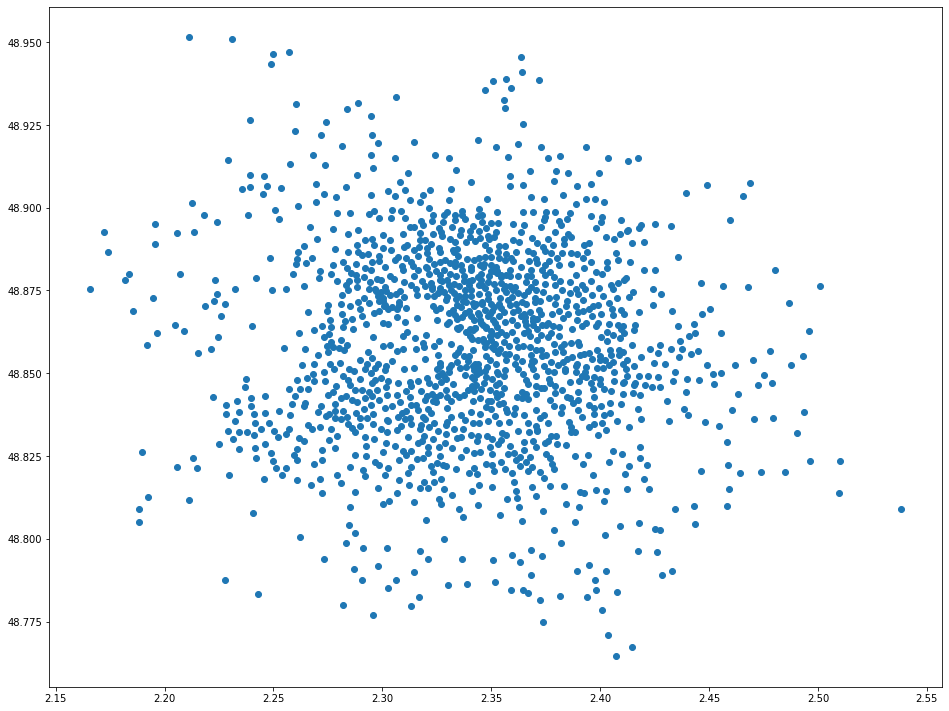

In [ ]:
velos_bornes["geometry"].plot(figsize=(16, 16))

In [ ]:
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Les types de valeurs sont inférés par Pandas, il se peut qu'il se trompe, la ligne ci-dessous permet de s'assurer que les valeurs de la colonne "capacity" sont interprétés en tant que chiffres.

In [ ]:
velos_bornes.capacity.describe()

count     1449
unique      62
top         30
freq        91
Name: capacity, dtype: object

In [ ]:
import pandas as pd
velos_bornes['capacity'] = pd.to_numeric(velos_bornes['capacity'], errors='coerce', downcast='integer')
#ici il est important de dire à Pandas d'interpreter le type de la colonne en tant qu'entier

In [ ]:
velos_bornes.capacity.describe()

count    1449.000000
mean       31.212560
std        11.976454
min         0.000000
25%        23.000000
50%        29.000000
75%        37.000000
max        74.000000
Name: capacity, dtype: float64

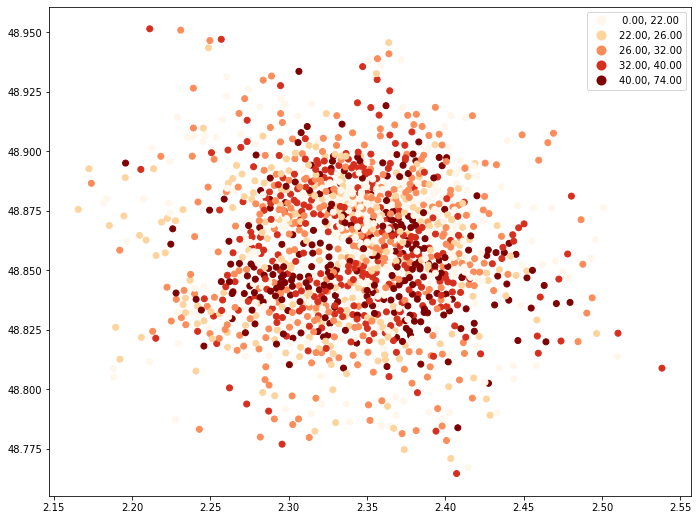

In [ ]:
velos_bornes.plot(column='capacity', scheme='Quantiles', k=5, figsize=(16, 9), cmap='OrRd', legend=True)

In [ ]:
velos_bornes.explore("capacity", # make choropleth based on "BoroName" column
     tooltip="name", # show "BoroName" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     cmap="OrRd", # use "Set1" matplotlib colormap
     scheme="Quantiles",
     categorical=False,
     k=5
    )

In [ ]:
gdf_quartier = geopandas.read_file(data_folder+"vecteurs/opendata-paris/quartier_paris.shp", encoding='utf-8')
# si l'on souhaite intégrer un fond de carte personnalisé   

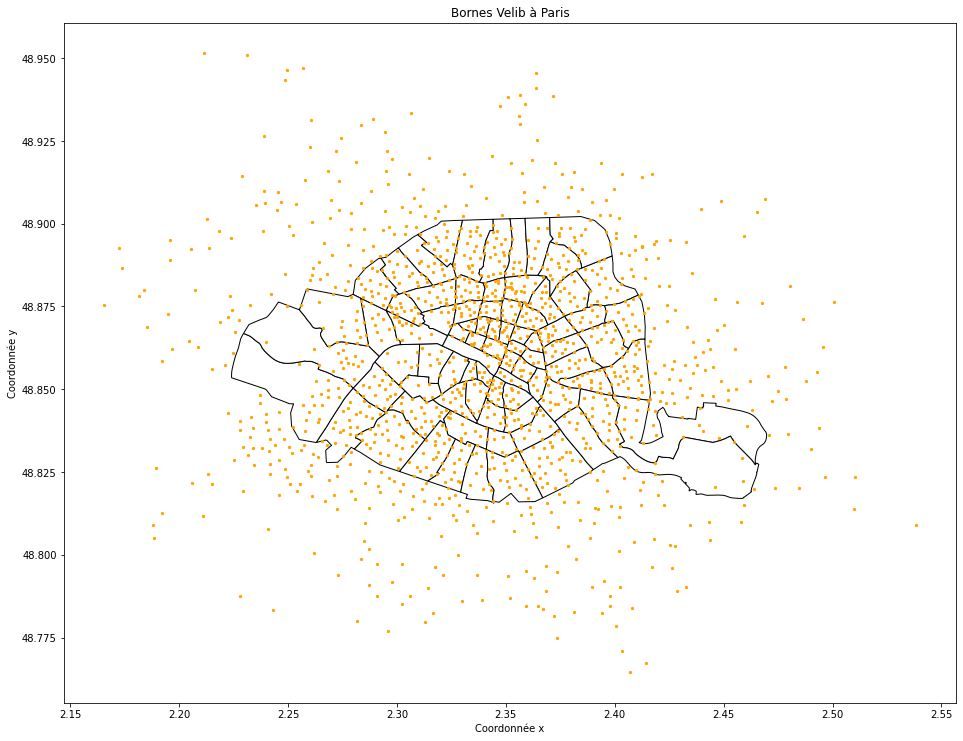

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 16))

# Afficher les jeux de données sur la carte
gdf_quartier.plot(ax=ax, color='white', edgecolor='black')
velos_bornes.plot(ax=ax, color='orange', markersize=5)

# Ajouter une grille de coordonnées et un titre
ax.set_xlabel('Coordonnée x')
ax.set_ylabel('Coordonnée y')
ax.set_title('Bornes Velib à Paris')

# Afficher la carte
plt.show()

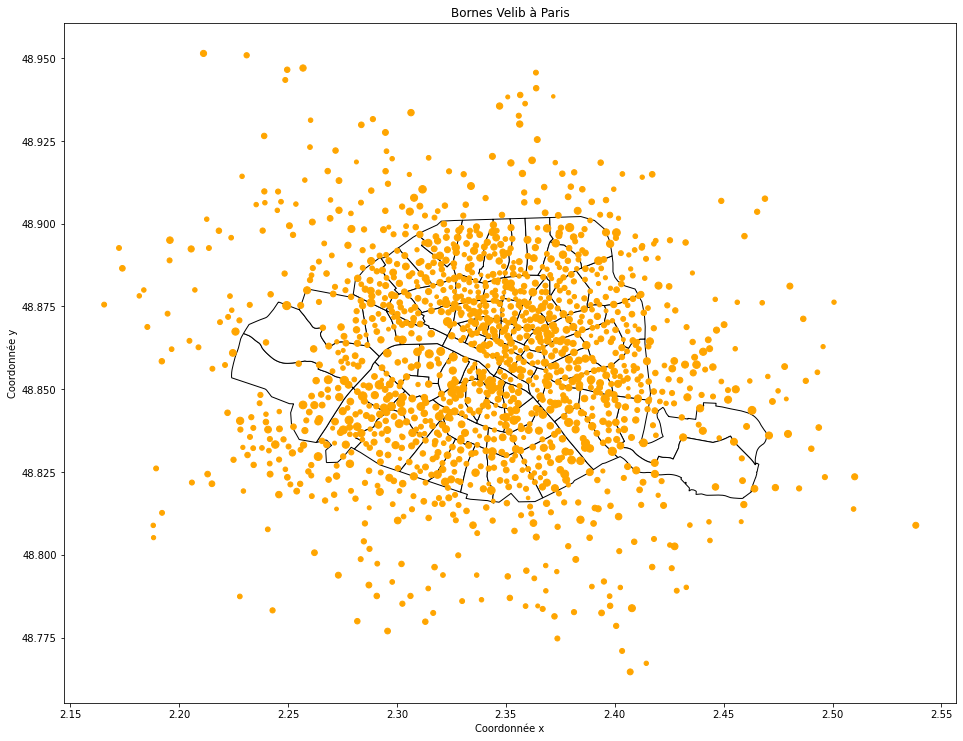

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 16))

# Afficher les jeux de données sur la carte
gdf_quartier.plot(ax=ax, color='white', edgecolor='black')
velos_bornes.plot(ax=ax, color='orange', markersize=velos_bornes['capacity']) #taille variable du point

# Ajouter une grille de coordonnées et un titre
ax.set_xlabel('Coordonnée x')
ax.set_ylabel('Coordonnée y')
ax.set_title('Bornes Velib à Paris')

# Afficher la carte
plt.show()

#data1.plot(ax=ax, color='red', markersize=data1['TAILLE_COLUMN'])

In [ ]:
gdf_quartier.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
df_bornes_par_quartier = geopandas.sjoin(velos_bornes, gdf_quartier, how="inner", op='intersects')
#l'ordre des paramètres est important et impacte la forme du résultat obtenu

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
df_bornes_par_quartier
# la géométrie d l'entité (ligne) est celle de la borne (point)

,stationcode,name,is_installe,capacity,numdocksava,numbikesava,mechanical,ebike,is_renting,is_returnin,...,geometry,index_right,n_sq_qu,c_qu,c_quinsee,l_qu,c_ar,n_sq_ar,perimetre,surface
0,16107,Benjamin Godard - Victor Hugo,OUI,35,34,1,0,1,OUI,OUI,...,POINT (2.27572 48.86598),69,750000063.0,63.0,7511603.0,Porte-Dauphine,16.0,750000016.0,7447.041546,3.086718e+06
267,16108,Sablons - Georges Mandel,OUI,38,36,1,1,0,OUI,OUI,...,POINT (2.28189 48.86388),69,750000063.0,63.0,7511603.0,Porte-Dauphine,16.0,750000016.0,7447.041546,3.086718e+06
347,16121,Jardin d'Acclimatation,OUI,33,14,17,9,8,OUI,OUI,...,POINT (2.27077 48.87877),69,750000063.0,63.0,7511603.0,Porte-Dauphine,16.0,750000016.0,7447.041546,3.086718e+06
357,16018,Flandrin - Henri Martin,OUI,18,14,4,0,4,OUI,OUI,...,POINT (2.27242 48.86433),69,750000063.0,63.0,7511603.0,Porte-Dauphine,16.0,750000016.0,7447.041546,3.086718e+06
432,16123,Mahatma Gandhi,OUI,26,0,26,12,14,OUI,OUI,...,POINT (2.26421 48.87636),69,750000063.0,63.0,7511603.0,Porte-Dauphine,16.0,750000016.0,7447.041546,3.086718e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,3009,Temple - Haudriettes,OUI,19,2,14,8,6,OUI,OUI,...,POINT (2.35670 48.86164),62,750000012.0,12.0,7510304.0,Sainte-Avoie,3.0,750000003.0,1861.804114,2.133164e+05
1108,3007,Archives - Pastourelle,OUI,28,8,17,14,3,OUI,OUI,...,POINT (2.35950 48.86236),62,750000012.0,12.0,7510304.0,Sainte-Avoie,3.0,750000003.0,1861.804114,2.133164e+05
1109,3006,Mairie du 3ème,OUI,32,9,21,12,9,OUI,OUI,...,POINT (2.36176 48.86446),31,750000010.0,10.0,7510302.0,Enfants-Rouges,3.0,750000003.0,2139.625388,2.717503e+05
1127,3003,Fille du Calvaire - Turenne,OUI,29,7,22,9,13,OUI,OUI,...,POINT (2.36496 48.86211),31,750000010.0,10.0,7510302.0,Enfants-Rouges,3.0,750000003.0,2139.625388,2.717503e+05


In [ ]:
df_quartier_avec_bornes = geopandas.sjoin(gdf_quartier, velos_bornes, how="inner", op='intersects')


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
df_quartier_avec_bornes
# la géométrie d l'entité (ligne) est celle du quartier (polygone)

,n_sq_qu,c_qu,c_quinsee,l_qu,c_ar,n_sq_ar,perimetre,surface,geometry,index_right,...,capacity,numdocksava,numbikesava,mechanical,ebike,is_renting,is_returnin,duedate,nom_arrondi,code_insee_
0,750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05,"POLYGON ((2.35262 48.85491, 2.35249 48.85467, ...",831,...,60,8,52,39,13,OUI,OUI,2023-01-11 11:29:55+01:00,Paris,None
0,750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05,"POLYGON ((2.35262 48.85491, 2.35249 48.85467, ...",1117,...,14,1,11,5,6,OUI,OUI,2023-01-11 11:28:31+01:00,Paris,None
0,750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05,"POLYGON ((2.35262 48.85491, 2.35249 48.85467, ...",1079,...,25,2,18,12,6,OUI,OUI,2023-01-11 11:27:56+01:00,Paris,None
0,750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05,"POLYGON ((2.35262 48.85491, 2.35249 48.85467, ...",1088,...,19,8,10,6,4,OUI,OUI,2023-01-11 11:27:51+01:00,Paris,None
0,750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05,"POLYGON ((2.35262 48.85491, 2.35249 48.85467, ...",882,...,32,2,26,16,10,OUI,OUI,2023-01-11 11:29:48+01:00,Paris,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,750000073.0,73.0,7511901.0,Villette,19.0,750000019.0,5191.018830,1.285705e+06,"POLYGON ((2.37050 48.87820, 2.37028 48.87799, ...",274,...,30,27,3,0,3,OUI,OUI,2023-01-11 11:29:32+01:00,Paris,None
79,750000073.0,73.0,7511901.0,Villette,19.0,750000019.0,5191.018830,1.285705e+06,"POLYGON ((2.37050 48.87820, 2.37028 48.87799, ...",982,...,42,36,4,1,3,OUI,OUI,2023-01-11 11:20:19+01:00,Paris,None
79,750000073.0,73.0,7511901.0,Villette,19.0,750000019.0,5191.018830,1.285705e+06,"POLYGON ((2.37050 48.87820, 2.37028 48.87799, ...",1241,...,55,52,2,1,1,OUI,OUI,2023-01-11 11:29:57+01:00,Paris,None
79,750000073.0,73.0,7511901.0,Villette,19.0,750000019.0,5191.018830,1.285705e+06,"POLYGON ((2.37050 48.87820, 2.37028 48.87799, ...",455,...,19,18,0,0,0,OUI,OUI,2023-01-11 11:22:18+01:00,Paris,None


In [ ]:
df_quartier_avec_bornes[df_quartier_avec_bornes['c_qu'] == 13]

,n_sq_qu,c_qu,c_quinsee,l_qu,c_ar,n_sq_ar,perimetre,surface,geometry,index_right,...,capacity,numdocksava,numbikesava,mechanical,ebike,is_renting,is_returnin,duedate,nom_arrondi,code_insee_
0,750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,313040.39655,"POLYGON ((2.35262 48.85491, 2.35249 48.85467, ...",831,...,60,8,52,39,13,OUI,OUI,2023-01-11 11:29:55+01:00,Paris,None
0,750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,313040.39655,"POLYGON ((2.35262 48.85491, 2.35249 48.85467, ...",1117,...,14,1,11,5,6,OUI,OUI,2023-01-11 11:28:31+01:00,Paris,None
0,750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,313040.39655,"POLYGON ((2.35262 48.85491, 2.35249 48.85467, ...",1079,...,25,2,18,12,6,OUI,OUI,2023-01-11 11:27:56+01:00,Paris,None
0,750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,313040.39655,"POLYGON ((2.35262 48.85491, 2.35249 48.85467, ...",1088,...,19,8,10,6,4,OUI,OUI,2023-01-11 11:27:51+01:00,Paris,None
0,750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,313040.39655,"POLYGON ((2.35262 48.85491, 2.35249 48.85467, ...",882,...,32,2,26,16,10,OUI,OUI,2023-01-11 11:29:48+01:00,Paris,None
0,750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,313040.39655,"POLYGON ((2.35262 48.85491, 2.35249 48.85467, ...",1095,...,29,10,16,9,7,OUI,OUI,2023-01-11 11:29:48+01:00,Paris,None
0,750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,313040.39655,"POLYGON ((2.35262 48.85491, 2.35249 48.85467, ...",830,...,23,13,7,5,2,OUI,OUI,2023-01-11 11:27:52+01:00,Paris,None
0,750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,313040.39655,"POLYGON ((2.35262 48.85491, 2.35249 48.85467, ...",848,...,26,1,24,19,5,OUI,OUI,2023-01-11 11:29:38+01:00,Paris,None
0,750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,313040.39655,"POLYGON ((2.35262 48.85491, 2.35249 48.85467, ...",1428,...,16,5,9,4,5,OUI,OUI,2023-01-11 11:29:00+01:00,Paris,None


Pour cartographier la capacité des bornes (à un instant t) par quartier, il faut faire la somme de la capacité de l'ensemble des bornes d'un quartier.

In [ ]:
sum_capacity_bornes_per_quartier = df_quartier_avec_bornes.groupby(['c_qu'], 
    as_index=False,
)['capacity'].sum()
sum_capacity_bornes_per_quartier.columns = ['c_qu', 'sum_capacite']  # rename the column
sum_capacity_bornes_per_quartier

,c_qu,sum_capacite
0,1.0,67.0
1,2.0,378.0
2,3.0,184.0
3,4.0,118.0
4,5.0,114.0
...,...,...
75,76.0,363.0
76,77.0,305.0
77,78.0,387.0
78,79.0,384.0


Pour cartographier, il faudra ré-associer les géometries des quartiers.

In [ ]:
capacite_sum_quartier = gdf_quartier.merge(
    sum_capacity_bornes_per_quartier, 
    on='c_qu', 
    how='left', 
)  
capacite_sum_quartier


,n_sq_qu,c_qu,c_quinsee,l_qu,c_ar,n_sq_ar,perimetre,surface,geometry,sum_capacite
0,750000013.0,13.0,7510401.0,Saint-Merri,4.0,750000004.0,2346.004687,3.130404e+05,"POLYGON ((2.35262 48.85491, 2.35249 48.85467, ...",244.0
1,750000016.0,16.0,7510404.0,Notre-Dame,4.0,750000004.0,3283.163371,3.782522e+05,"POLYGON ((2.36131 48.84858, 2.36151 48.84823, ...",100.0
2,750000028.0,28.0,7510704.0,Gros-Caillou,7.0,750000007.0,4720.994373,1.381893e+06,"POLYGON ((2.30954 48.85396, 2.30646 48.85413, ...",355.0
3,750000041.0,41.0,7511101.0,Folie-Méricourt,11.0,750000011.0,3724.352694,7.257525e+05,"POLYGON ((2.37010 48.86376, 2.36690 48.86246, ...",530.0
4,750000007.0,7.0,7510203.0,Mail,2.0,750000002.0,2179.153605,2.781426e+05,"POLYGON ((2.34684 48.86491, 2.34668 48.86443, ...",228.0
...,...,...,...,...,...,...,...,...,...,...
75,750000014.0,14.0,7510402.0,Saint-Gervais,4.0,750000004.0,2678.340923,4.220282e+05,"POLYGON ((2.36376 48.85568, 2.36294 48.85456, ...",192.0
76,750000025.0,25.0,7510701.0,Saint-Thomas-d'Aquin,7.0,750000007.0,3827.253353,8.265594e+05,"POLYGON ((2.32213 48.84925, 2.32054 48.84842, ...",292.0
77,750000038.0,38.0,7511002.0,Porte-Saint-Denis,10.0,750000010.0,2736.292954,4.721136e+05,"POLYGON ((2.35534 48.87126, 2.35426 48.86933, ...",254.0
78,750000001.0,1.0,7510101.0,Saint-Germain-l'Auxerrois,1.0,750000001.0,5057.549475,8.690007e+05,"POLYGON ((2.34459 48.85405, 2.34459 48.85405, ...",67.0


In [ ]:
capacite_sum_quartier.sum_capacite.describe()

count      80.000000
mean      403.037500
std       232.907405
min        67.000000
25%       234.750000
50%       370.000000
75%       530.250000
max      1167.000000
Name: sum_capacite, dtype: float64

In [ ]:
capacite_sum_quartier.explore(
     column="sum_capacite", # make choropleth based on "BoroName" column
     tooltip="l_qu", # show "BoroName" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
    cmap="Blues" # use "Set1" matplotlib colormap
    )

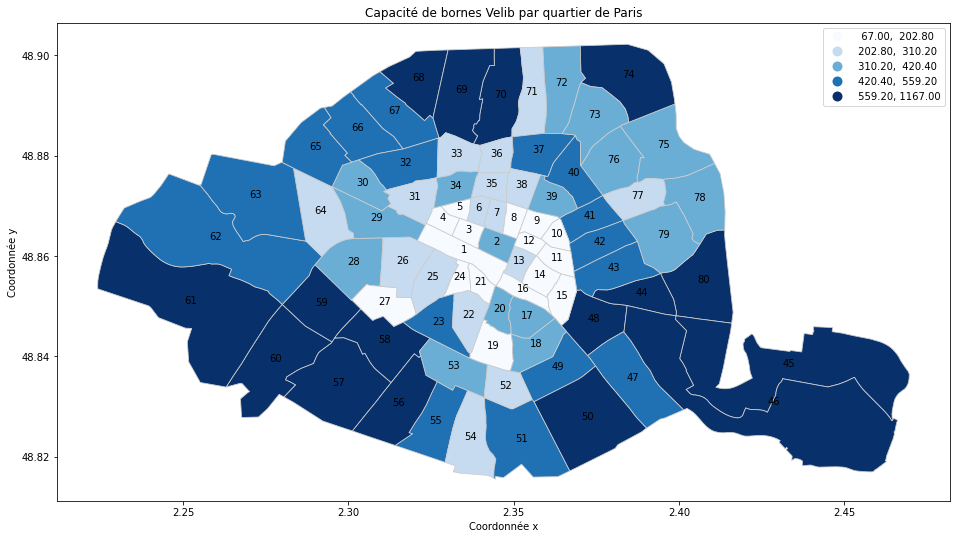

In [ ]:
import matplotlib.pyplot as plt

# Afficher les jeux de données sur une carte à imprimer
ax = capacite_sum_quartier.plot(column='sum_capacite', cmap='Blues', linewidth=0.8, edgecolor='0.8', scheme='Quantiles', k=5, legend=True, figsize=(16, 16))

# Ajouter une grille de coordonnées et un titre
ax.set_xlabel('Coordonnée x')
ax.set_ylabel('Coordonnée y')
ax.set_title('Capacité de bornes Velib par quartier de Paris')

# Ajouter les étiquettes
for idx, row in capacite_sum_quartier.iterrows():
    ax.annotate(s=int(row['c_qu']), xy=row.geometry.centroid.coords[0],
                horizontalalignment='center', fontsize=10)

# Afficher la carte
plt.show()

Export d'une carte sous différents formats (jpeg, svg).
Ce dernier format permet une retouche dans un logiciel de dessin dans le cas d'améliorer une carte pour une publication par exemple.


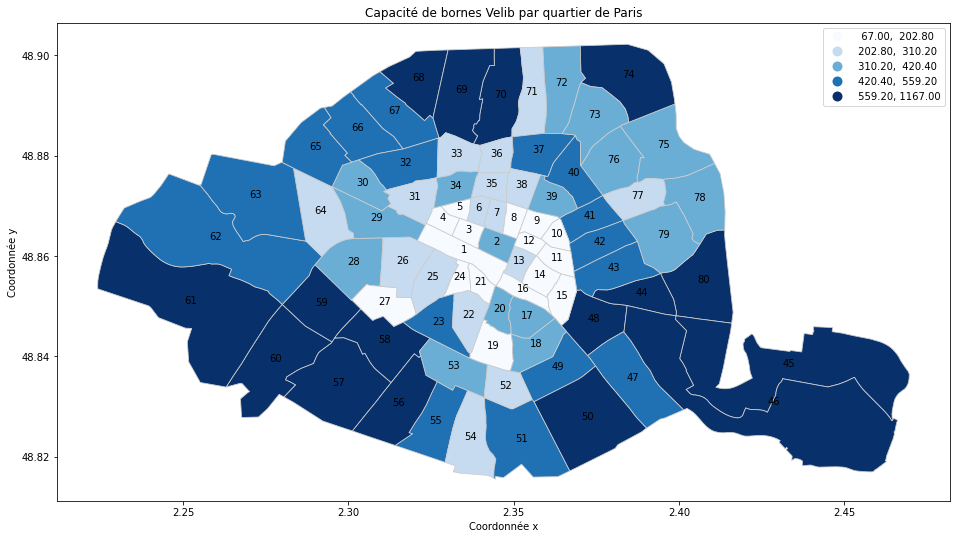

In [ ]:
import matplotlib.pyplot as plt

# Afficher les jeux de données sur une carte à imprimer
ax = capacite_sum_quartier.plot(column='sum_capacite', cmap='Blues', linewidth=0.8, edgecolor='0.8', scheme='Quantiles', k=5, legend=True, figsize=(16, 16))

# Ajouter une grille de coordonnées et un titre
ax.set_xlabel('Coordonnée x')
ax.set_ylabel('Coordonnée y')
ax.set_title('Capacité de bornes Velib par quartier de Paris')

# Ajouter les étiquettes
for idx, row in capacite_sum_quartier.iterrows():
    ax.annotate(s=int(row['c_qu']), xy=row.geometry.centroid.coords[0],
                horizontalalignment='center', fontsize=10)

# sauvegarder la carte
plt.savefig("capacite_bornes_Velib_quartier_Paris.jpg", dpi=300, bbox_inches='tight') 
#pour demander un format SVG il suffit de changer l'extension du fichier dans la ligne ci-dessus en .svg


Export des données en format SIG pour les manipuler ailleurs si souhaité, par exemple, il suffit via QGIS d'ajouter ce jeu de données en tant que couche.

In [ ]:
capacite_sum_quartier.to_file("capacite_sum_quartier.shp")
#cette sortie est complète mais pour éviter les advertissements, il est possible de produire un autre format comme GeoJson ou Geopackage qui est aussi lisible par QGIS,
# voir https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_file.html 

<ipython-input-109-57410bc8ae9b>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  capacite_sum_quartier.to_file("capacite_sum_quartier.shp")


Maintenant nous allons nous intéresser à la zone d'influence d'une borne (point d'interet) pour identifier les bornes les plus proches, par le biais de l'opération spatiale 'buffer', voir cette [illustration](https://saylordotorg.github.io/text_essentials-of-geographic-information-systems/section_11/5c7eb6fc4bcbfc5117d778f0aabfded6.jpg). 

Ce type d'analyse est également utilisé pour l'analyse de risque afin d'identifier les zones à risque, par exemple, les zones inondables, les zones à risque d'incendie, etc, pour les événements naturels ou les activités humaines.

In [ ]:
df_bornes_par_quartier_14 = df_bornes_par_quartier.loc[df_bornes_par_quartier['c_ar'] == 14]


In [ ]:
df_bornes_par_quartier_14

,stationcode,name,is_installe,capacity,numdocksava,numbikesava,mechanical,ebike,is_renting,is_returnin,...,geometry,index_right,n_sq_qu,c_qu,c_quinsee,l_qu,c_ar,n_sq_ar,perimetre,surface
2,14014,Jourdan - Stade Charléty,OUI,60,57,2,2,0,OUI,OUI,...,POINT (2.34334 48.81943),46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
63,14013,Liard - Amiral Mouchez,OUI,14,13,0,0,0,OUI,OUI,...,POINT (2.34217 48.82142),46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
211,14012,Sibelle - Alésia,OUI,25,23,2,1,1,OUI,OUI,...,POINT (2.33850 48.82670),46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
215,14124,David Weill - Parc Montsouris,OUI,22,21,1,0,1,OUI,OUI,...,POINT (2.33373 48.82109),46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
596,14007,Ferrus - Saint-Jacques,OUI,34,28,4,0,4,OUI,OUI,...,POINT (2.34086 48.83139),46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
632,14016,René Coty - Parc Montsouris,OUI,55,55,0,0,0,OUI,OUI,...,POINT (2.33612 48.82479),46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
648,14125,Dareau - Broussais,OUI,24,23,0,0,0,OUI,OUI,...,POINT (2.33618 48.83078),46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
970,14135,Jourdan - Cité Universitaire,OUI,39,35,4,1,3,OUI,OUI,...,POINT (2.33970 48.81990),46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
1283,14009,Tombe Issoire - René Coty,OUI,36,33,2,1,1,OUI,OUI,...,POINT (2.33436 48.83051),46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
9,14111,Cassini - Denfert-Rochereau,OUI,25,20,2,1,1,OUI,OUI,...,POINT (2.33604 48.83753),36,750000053.0,53.0,7511401.0,Montparnasse,14.0,750000014.0,4565.136189,1.126205e+06


In [ ]:
df_bornes_par_quartier_14.set_index("stationcode")

,name,is_installe,capacity,numdocksava,numbikesava,mechanical,ebike,is_renting,is_returnin,duedate,...,geometry,index_right,n_sq_qu,c_qu,c_quinsee,l_qu,c_ar,n_sq_ar,perimetre,surface
stationcode,,,,,,,,,,,,,,,,,,,,,
14014,Jourdan - Stade Charléty,OUI,60,57,2,2,0,OUI,OUI,2023-01-11 11:25:22+01:00,...,POINT (2.34334 48.81943),46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
14013,Liard - Amiral Mouchez,OUI,14,13,0,0,0,OUI,OUI,2023-01-11 11:27:34+01:00,...,POINT (2.34217 48.82142),46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
14012,Sibelle - Alésia,OUI,25,23,2,1,1,OUI,OUI,2023-01-11 11:20:17+01:00,...,POINT (2.33850 48.82670),46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
14124,David Weill - Parc Montsouris,OUI,22,21,1,0,1,OUI,OUI,2023-01-11 11:27:27+01:00,...,POINT (2.33373 48.82109),46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
14007,Ferrus - Saint-Jacques,OUI,34,28,4,0,4,OUI,OUI,2023-01-11 11:24:31+01:00,...,POINT (2.34086 48.83139),46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
14016,René Coty - Parc Montsouris,OUI,55,55,0,0,0,OUI,OUI,2023-01-11 11:20:28+01:00,...,POINT (2.33612 48.82479),46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
14125,Dareau - Broussais,OUI,24,23,0,0,0,OUI,OUI,2023-01-11 11:23:42+01:00,...,POINT (2.33618 48.83078),46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
14135,Jourdan - Cité Universitaire,OUI,39,35,4,1,3,OUI,OUI,2023-01-11 11:23:30+01:00,...,POINT (2.33970 48.81990),46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06
14009,Tombe Issoire - René Coty,OUI,36,33,2,1,1,OUI,OUI,2023-01-11 11:23:26+01:00,...,POINT (2.33436 48.83051),46,750000054.0,54.0,7511402.0,Parc-de-Montsouris,14.0,750000014.0,5224.265369,1.357950e+06


In [ ]:
df_bornes_par_quartier_14.geometry.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
def buffer_in_mercator(geometry, distance_x_meters):
  crs = geometry.crs
  return geometry.to_crs(epsg=2154).buffer(distance_x_meters).to_crs(crs)

In [ ]:
areas = buffer_in_mercator(df_bornes_par_quartier_14.set_index("stationcode").geometry, 300)
df_bornes_par_quartier_14_areas = areas.to_frame().rename(columns={0:'geometry'})
df_bornes_par_quartier_14_areas = geopandas.GeoDataFrame(df_bornes_par_quartier_14_areas, geometry=df_bornes_par_quartier_14_areas['geometry'])
df_bornes_par_quartier_14_areas


,geometry
stationcode,
14014,"POLYGON ((2.34742 48.81945, 2.34740 48.81919, ..."
14013,"POLYGON ((2.34625 48.82144, 2.34624 48.82117, ..."
14012,"POLYGON ((2.34258 48.82672, 2.34257 48.82646, ..."
14124,"POLYGON ((2.33781 48.82112, 2.33780 48.82085, ..."
14007,"POLYGON ((2.34494 48.83141, 2.34493 48.83115, ..."
14016,"POLYGON ((2.34021 48.82481, 2.34019 48.82455, ..."
14125,"POLYGON ((2.34027 48.83080, 2.34025 48.83053, ..."
14135,"POLYGON ((2.34379 48.81992, 2.34377 48.81966, ..."
14009,"POLYGON ((2.33845 48.83054, 2.33843 48.83027, ..."


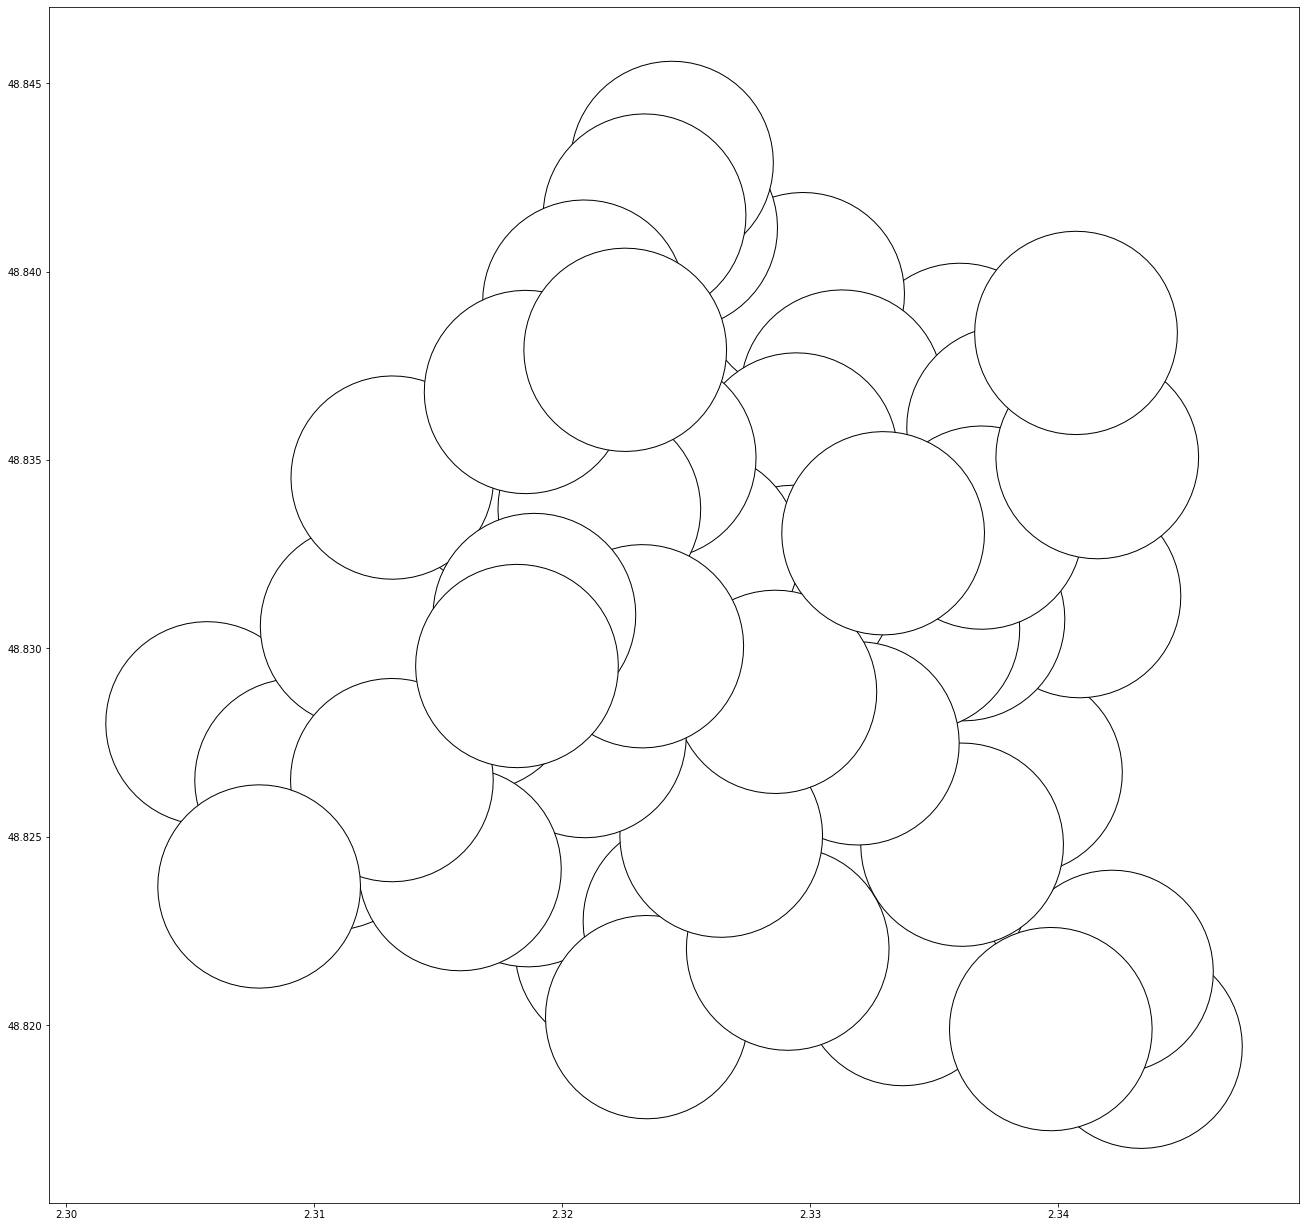

In [ ]:
df_bornes_par_quartier_14_areas.plot(figsize = (25, 22), color='white', edgecolor='black')

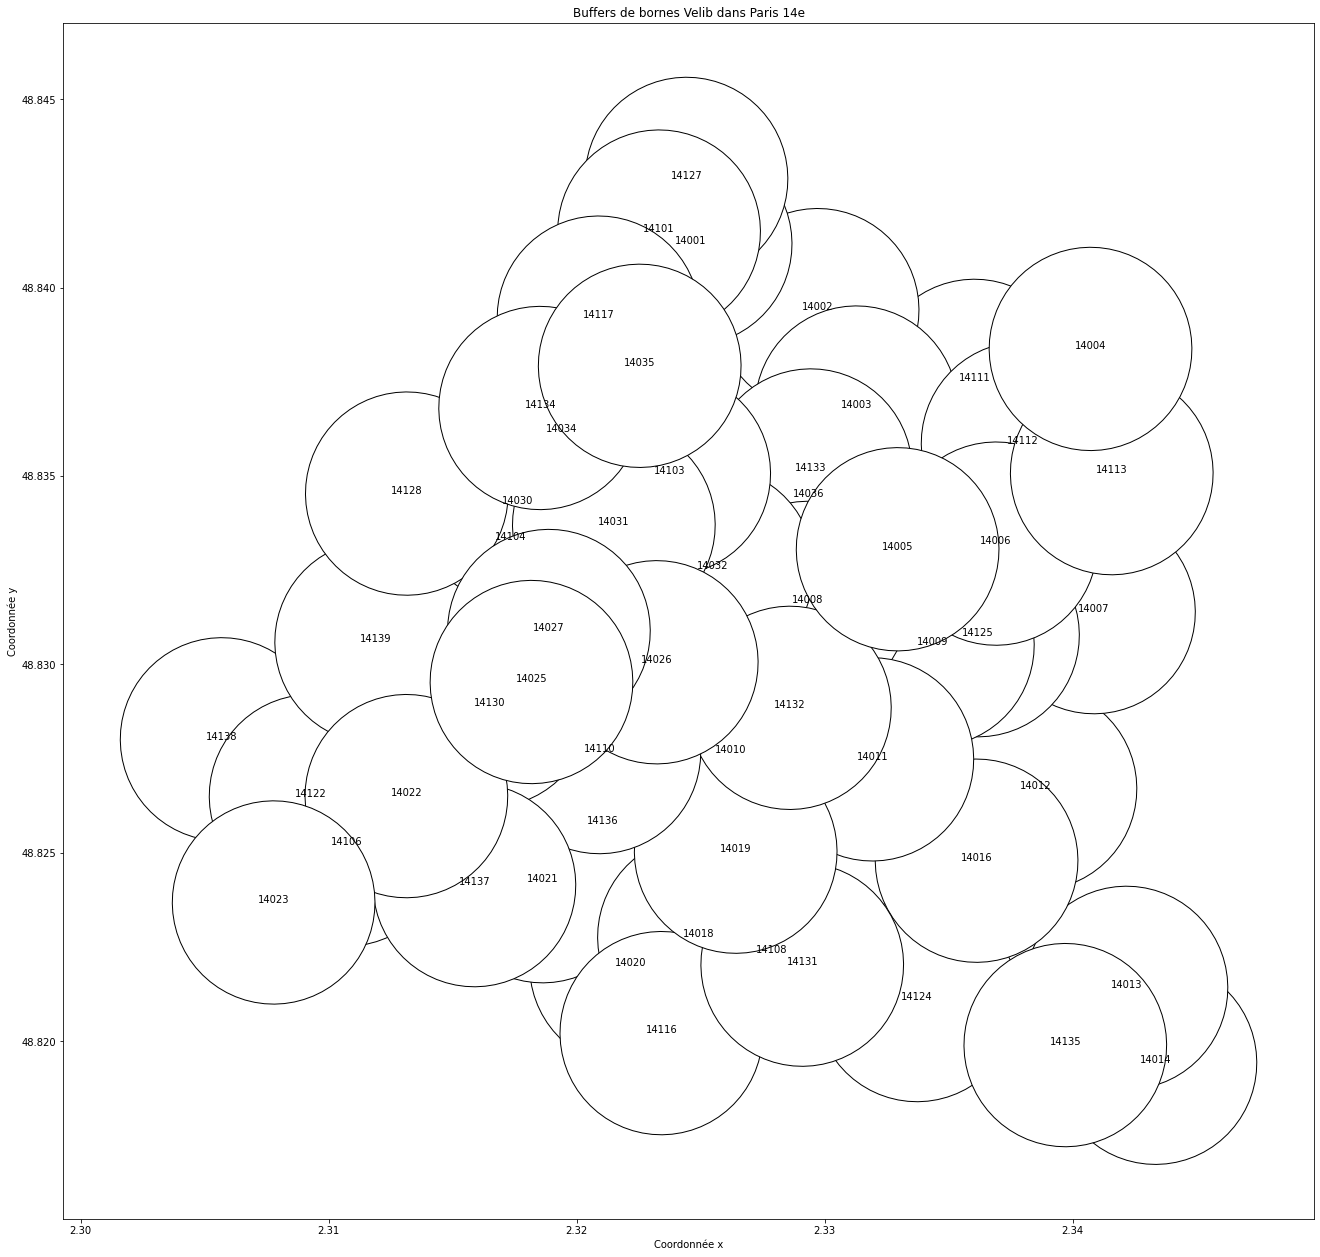

In [ ]:
import matplotlib.pyplot as plt

# Afficher les jeux de données sur une carte à imprimer
ax = df_bornes_par_quartier_14_areas.plot(figsize = (25, 22), color='white', edgecolor='black')

# Ajouter une grille de coordonnées et un titre
ax.set_xlabel('Coordonnée x')
ax.set_ylabel('Coordonnée y')
ax.set_title('Buffers de bornes Velib dans Paris 14e')

# Ajouter les étiquettes
for idx, row in df_bornes_par_quartier_14_areas.iterrows():
  ax.annotate(s=idx, xy=row.geometry.centroid.coords[0], horizontalalignment='center', fontsize=10)

# Afficher la carte
plt.show()

In [ ]:
df_bornes_par_quartier_14_areas.explore()

Nous allons pouvoir ensuite déterminer quelle est la meilleure zone pour prendre un vélo, cela se traduit spatialement comme les zones d'intersection du plus grand nombre de zones d'influence de bornes. 

Attention, une analyse plus précise pourrait intégrer la colonne numbikesava qui contient le nombre de vélos disponible pour une borne. Ici nous n'allons pas intégrer ce paramètre.

In [ ]:
import geopandas as gpd

polygons = df_bornes_par_quartier_14_areas.geometry

# Initialiser un dictionnaire pour stocker le nombre d'intersections pour chaque polygone
intersection_count = {i: 0 for i in polygons.index}

# Boucle pour parcourir chaque polygone de la série
for i, poly1 in polygons.iteritems():
    for j, poly2 in polygons.iteritems():
        if i != j:
            # Calculer l'intersection entre deux polygones
            intersection = poly1.intersection(poly2)
            if not intersection.is_empty:
                intersection_count[i] += 1 # l'intersection est une opération symetrique mais on ne tient compte que d'un sens
                

print(intersection_count)

{'14014': 2, '14013': 3, '14012': 5, '14124': 4, '14007': 6, '14016': 4, '14125': 9, '14135': 3, '14009': 9, '14111': 9, '14002': 8, '14003': 9, '14036': 11, '14001': 5, '14112': 8, '14006': 11, '14127': 5, '14101': 5, '14113': 5, '14133': 10, '14004': 3, '14108': 6, '14020': 8, '14008': 13, '14136': 12, '14021': 11, '14018': 8, '14116': 6, '14010': 9, '14131': 6, '14032': 10, '14011': 8, '14019': 11, '14132': 10, '14005': 11, '14138': 5, '14106': 7, '14110': 11, '14117': 7, '14034': 9, '14104': 11, '14130': 12, '14122': 7, '14139': 9, '14030': 10, '14128': 6, '14103': 14, '14031': 11, '14026': 12, '14137': 9, '14022': 11, '14023': 5, '14134': 8, '14027': 13, '14035': 11, '14025': 11}


/usr/local/lib/python3.8/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


In [ ]:
#intersection_count['14135'] #3
#intersection_count['14014'] #2
#intersection_count['14124'] #4
intersection_count['14016'] #4


4

In [ ]:
bornes_a_utiliser = sorted(intersection_count.items(), key=lambda x: x[1], reverse=True)

In [ ]:
bornes_a_utiliser

[('14103', 14),
 ('14008', 13),
 ('14027', 13),
 ('14136', 12),
 ('14130', 12),
 ('14026', 12),
 ('14036', 11),
 ('14006', 11),
 ('14021', 11),
 ('14019', 11),
 ('14005', 11),
 ('14110', 11),
 ('14104', 11),
 ('14031', 11),
 ('14022', 11),
 ('14035', 11),
 ('14025', 11),
 ('14133', 10),
 ('14032', 10),
 ('14132', 10),
 ('14030', 10),
 ('14125', 9),
 ('14009', 9),
 ('14111', 9),
 ('14003', 9),
 ('14010', 9),
 ('14034', 9),
 ('14139', 9),
 ('14137', 9),
 ('14002', 8),
 ('14112', 8),
 ('14020', 8),
 ('14018', 8),
 ('14011', 8),
 ('14134', 8),
 ('14106', 7),
 ('14117', 7),
 ('14122', 7),
 ('14007', 6),
 ('14108', 6),
 ('14116', 6),
 ('14131', 6),
 ('14128', 6),
 ('14012', 5),
 ('14001', 5),
 ('14127', 5),
 ('14101', 5),
 ('14113', 5),
 ('14138', 5),
 ('14023', 5),
 ('14124', 4),
 ('14016', 4),
 ('14013', 3),
 ('14135', 3),
 ('14004', 3),
 ('14014', 2)]

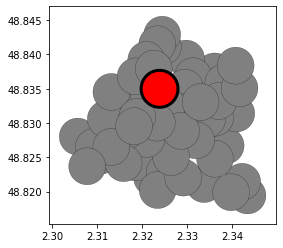

In [ ]:
# créer la carte
ax = df_bornes_par_quartier_14_areas.plot(color='grey',edgecolor='black', linewidth=0.2)

# recuperer le polygone a mettre en evidence
souligner_polygone = df_bornes_par_quartier_14_areas[df_bornes_par_quartier_14_areas.index == '14103']

# mettre en évidence le polygone
souligner_polygone.plot(ax=ax, color='red', edgecolor='black', linewidth=3)

#mettre à jour la carte
plt.show()